In [3]:
from pyspectrum import Spectrometer, UsbID, Spectrum, Data
import matplotlib.pyplot as plt

from pyrometer import Pyrometer

In [4]:
# Настройки описаны в в предыдущем примере
device = Spectrometer(UsbID())
device.set_config(
    exposure=1, n_times=100,
    wavelength_calibration_path='data/profile.json' 
)

device.read_dark_signal(n_times=1000)

Wavelength calibration loaded


In [5]:

# Пирометру нужен калибровочный спектр
# Данный спектр был записан с лампы с цветовой температурой 2526.85 градусов
# Процедура записи спектра описана в предыдущем примере
pyrometer = Pyrometer(
    calibration_spectrum=Spectrum.load('data/lamp2'),
    calibration_temp=2526.85,
)

In [6]:
# Читаем 100 кадров с устройства
measured_data = device.read()

pyrometer.run(
    spectrum=measured_data, 
    wavelength_range=(500, 1000) # Интервал длин волн, 
                                 # по которому будет определяться температура
)

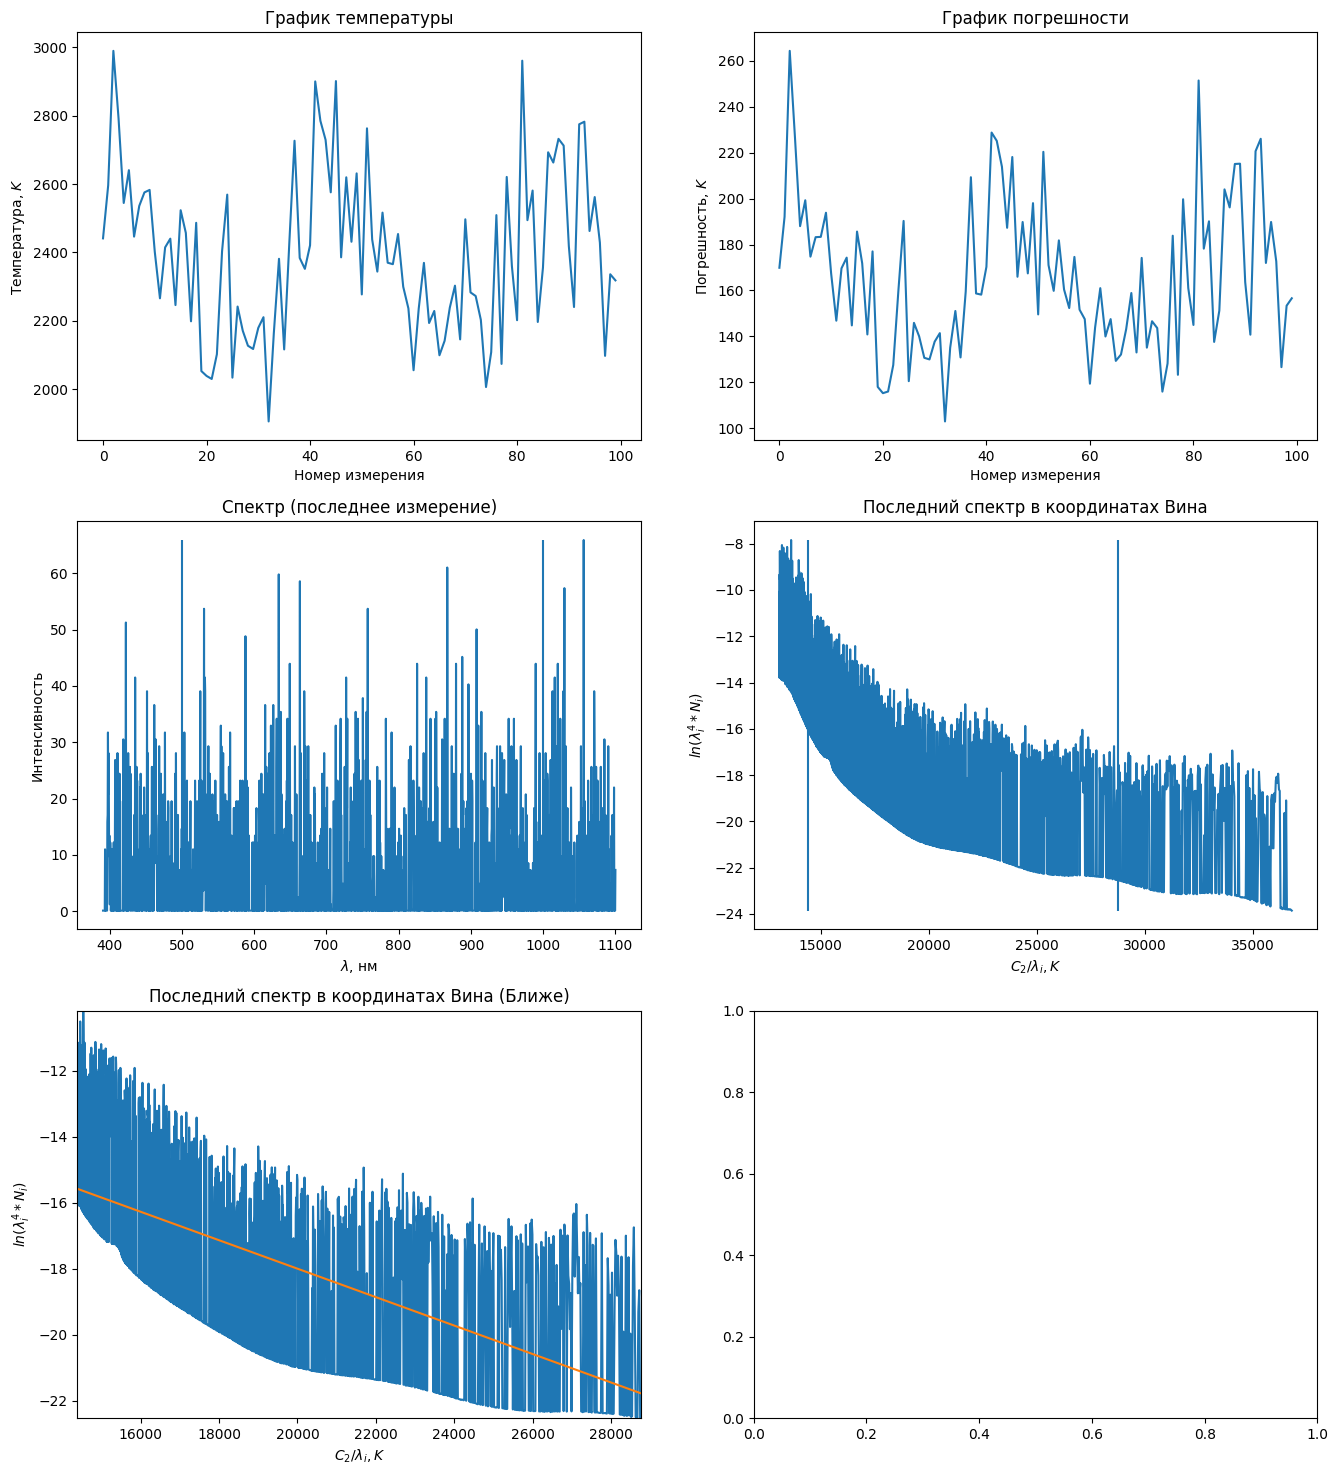

In [7]:
pyrometer.show(filename='result.png')

2226.2008773188004

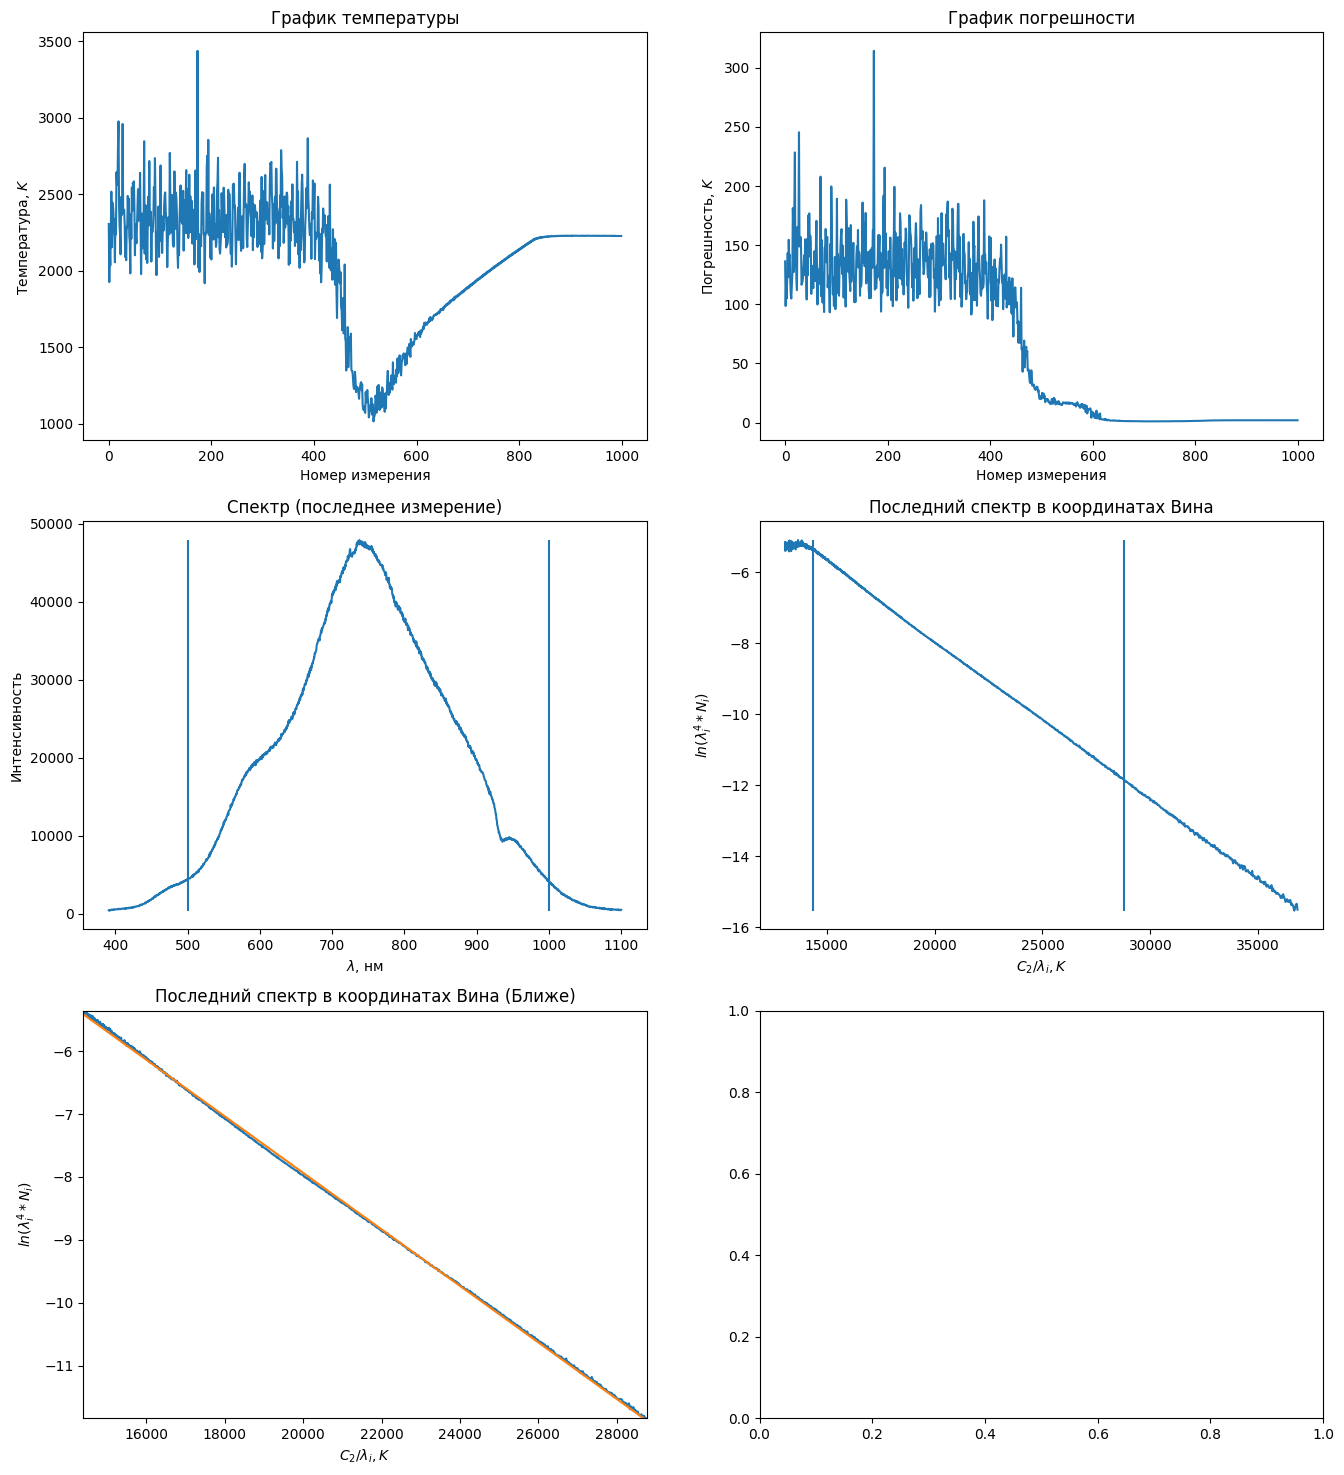

In [8]:
# Обработка заранее записанных данных
# Нагрев графитовой кюветы до температуры ~ 2200 градусов
pyrometer.run(Spectrum.load('data/heat_2200'), (500, 1000))
pyrometer.show()
pyrometer.get_temperature()[-1]